In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
traindf_noisy=pd.read_csv('../input/freesound-audio-tagging-2019/train_noisy.csv',dtype=str)

traindf_curated=pd.read_csv('../input/freesound-audio-tagging-2019/train_curated.csv',dtype=str)

In [3]:
traindf_noisy.head()

,fname,labels
0,00097e21.wav,Bathtub_(filling_or_washing)
1,000b6cfb.wav,Motorcycle
2,00116cd2.wav,"Marimba_and_xylophone,Glockenspiel"
3,00127d14.wav,"Water_tap_and_faucet,Sink_(filling_or_washing)"
4,0019adae.wav,Raindrop


In [4]:
train_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Noisy/Noisy_train_4.csv")
train_df.head()

,fname,labels
0,161d2bb8.jpg,"Bus,Microwave_oven"
1,abf3a850.jpg,Bus
2,fd802069.jpg,Cheering
3,0f69e008_aug.jpg,Purr
4,5c51827a.jpg,Applause


In [5]:
train_df.shape

(19449, 2)

In [6]:
cv_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Noisy/Noisy_cv_4.csv")
cv_df.shape

(4862, 2)

In [7]:
    
test_df = pd.read_csv("../input/sc2-total-aug-noisy-data/K_fold_data/K_fold_data/Noisy/Noisy_test.csv") 
test_df.shape

(6078, 2)

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb_train = MultiLabelBinarizer()


labels_train = mlb_train.fit_transform([ i.split(",") for i in list(train_df["labels"])])


labels_test = mlb_train.transform([ i.split(",") for i in list(test_df["labels"])])


#mlb_cv = MultiLabelBinarizer()
labels_cv = mlb_train.transform([ i.split(",") for i in list(cv_df["labels"])])


In [9]:
labels_test.shape

(6078, 80)

In [10]:
trainmultidf=pd.DataFrame(data=labels_train,columns=list(mlb_train.classes_))
trainmultidf["fname"]=list(train_df["fname"])

testmultidf=pd.DataFrame(data=labels_test,columns=list(mlb_train.classes_))
testmultidf["fname"]=list(test_df["fname"])


cvmultidf=pd.DataFrame(data=labels_cv,columns=list(mlb_train.classes_))
cvmultidf["fname"]=list(cv_df["fname"])


In [11]:
#We change the ids for the images in the csv files to reflect their new status as jpgs
#https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
from keras_preprocessing.image import ImageDataGenerator



datagen=ImageDataGenerator(rescale=1./255.,zoom_range=[0.5,1.0],brightness_range=[0.8,1.4])


train_generator=datagen.flow_from_dataframe(
    dataframe=trainmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total Images bucket Noisy/Total Images bucket Noisy",
    x_col="fname",
    y_col=list(mlb_train.classes_),
    subset="training",
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode="raw",
    #color_mode="grayscale",
    target_size=(128,128))



Found 19449 validated image filenames.


In [12]:
train_generator.n

19449

In [13]:
cvmultidf.shape

(4862, 81)

In [14]:
cvmultidf.head()

,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,...,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing),fname
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,663172d7.jpg
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,eaa46c62.jpg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7b5bcb5a_aug.jpg
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,deda9c42.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9b85cccc_aug.jpg


In [15]:

valid_datagen=ImageDataGenerator(rescale=1./255.)

valid_generator=valid_datagen.flow_from_dataframe(
    dataframe=cvmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total Images bucket Noisy/Total Images bucket Noisy",
    x_col="fname",
    y_col=list(mlb_train.classes_),
   # subset="validation",
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode="raw",
    #color_mode="grayscale",
    target_size=(128,128))


Found 4862 validated image filenames.


In [16]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testmultidf,
    directory="../input/sc2-total-aug-noisy-data/Total Images bucket Noisy/Total Images bucket Noisy",
    x_col="fname",
    y_col=None,
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode=None,
   # color_mode="grayscale",
    target_size=(128,128))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 6078 validated image filenames.


In [17]:
from sklearn import model_selection
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence



import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv2D, MaxPooling2D, Dropout, Activation, Input,BatchNormalization, AveragePooling2D,GlobalMaxPool2D,PReLU

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                             EarlyStopping, ReduceLROnPlateau,CSVLogger)

In [18]:
#last_layer = model.get_layer('avg_pool').output

image_input = Input(shape=(128,128, 3))
model = tf.keras.applications.MobileNet(input_tensor=image_input, include_top=True)
last_layer = model.layers[-3].output#model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
#model=


#output = Dense(80, activation='sigmoid', name='output_layer')(model.layers[-2].output)
x= Dense(80)(x)
output = Activation('sigmoid')(x)
#out = Dense(num_classes, activation='softmax', name='output_layer')(x)

17227776/17225924 [==============================] - 0s 0us/step


In [19]:
custom_densenet169_model = Model(inputs=image_input,outputs= output)
custom_densenet169_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [20]:
#from tensorflow.keras.utils import plot_model
#plot_model(custom_densenet169_model, 'model_resnet50.png', show_shapes=True)

In [21]:
opt = tf.keras.optimizers.Adam(lr=0.0009)#tf.keras.optimizers.RMSprop(lr=0.3, decay=1e-6) 
#tf.keras.optimizers.Adam(lr=0.001)#RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
custom_densenet169_model.compile(loss=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM),#,label_smoothing=0.7#'categorical_crossentropy',
              optimizer=opt,
               metrics=['categorical_accuracy'])

In [22]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [23]:
STEP_SIZE_TRAIN

303

In [24]:
# simple early stopping
#earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100,)
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/


#model_checkpoint = ModelCheckpoint('weights_cnn_lstm.best.hdf5', monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)
#filepath="weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5"


csv_logger = CSVLogger(filename='../working/training_log.csv',
                       separator=',',
                       append=True)
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
reduceLROnPlat = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.6,
                              patience=6, min_lr=0,verbose=1)


model_checkpoint = ModelCheckpoint("ResNetNoisyTotal.best_weights-128.hdf5", monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model

#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.001 )
es = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1, patience=30, min_delta=0.001 )

callbacks_list = [model_checkpoint, csv_logger, reduceLROnPlat,es]

In [25]:

#custom_densenet169_model.load_weights("../input/sc2weights/total.best_weights.hdf5")
#custom_densenet169_model.load_weights("../input/sc2weights/total.best_weights_iter2.hdf5")

In [26]:
history=custom_densenet169_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=300,
                    callbacks=callbacks_list
)

Epoch 1/300
303/303 [==============================] - ETA: 0s - loss: 5.6924 - categorical_accuracy: 0.1057
Epoch 00001: val_categorical_accuracy improved from -inf to 0.08292, saving model to ResNetNoisyTotal.best_weights-128.hdf5
303/303 [==============================] - 176s 580ms/step - loss: 5.6924 - categorical_accuracy: 0.1057 - val_loss: 7.9042 - val_categorical_accuracy: 0.0829
Epoch 2/300
303/303 [==============================] - ETA: 0s - loss: 3.8759 - categorical_accuracy: 0.1968
Epoch 00002: val_categorical_accuracy improved from 0.08292 to 0.16667, saving model to ResNetNoisyTotal.best_weights-128.hdf5
303/303 [==============================] - 137s 453ms/step - loss: 3.8759 - categorical_accuracy: 0.1968 - val_loss: 4.7462 - val_categorical_accuracy: 0.1667
Epoch 3/300
303/303 [==============================] - ETA: 0s - loss: 3.6019 - categorical_accuracy: 0.2518
Epoch 00003: val_categorical_accuracy improved from 0.16667 to 0.23354, saving model to ResNetNoisyTotal

In [27]:
#history.history

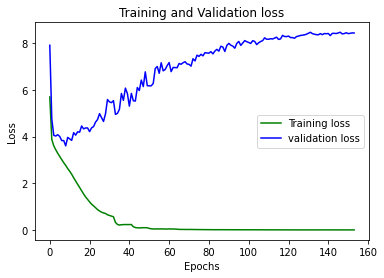

In [28]:
import matplotlib.pyplot as plt


loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = np.range(1,1)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

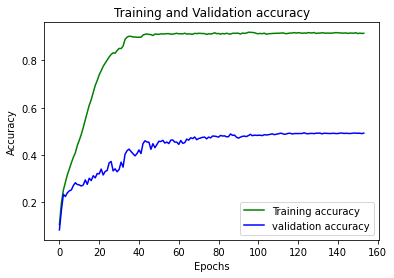

In [29]:
loss_train = history.history['categorical_accuracy']
loss_val = history.history['val_categorical_accuracy']
epochs = range(1,41)
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
res = custom_densenet169_model.predict_generator(valid_generator, verbose=1)

    

76/76 [==============================] - 8s 112ms/step


In [31]:
test_generator.reset()
res_test=custom_densenet169_model.predict_generator(test_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

95/95 [==============================] - 14s 144ms/step


In [32]:
valid_generator.reset()
res_cv=custom_densenet169_model.predict_generator(valid_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

76/76 [==============================] - 8s 103ms/step


In [33]:
train_generator.reset()
res_train=custom_densenet169_model.predict_generator(train_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

304/304 [==============================] - 118s 387ms/step


In [34]:
res_test.shape

(6078, 80)

In [35]:
# Converting taget and identity columns to booleans

target_columns=list(trainmultidf.columns)[:-1]

def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, True, False)
    
def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    for col in target_columns:
        convert_to_bool(bool_df, col)
    return bool_df

test_bool = convert_dataframe_to_bool(testmultidf) 
test_lable_bool=test_bool[list(test_bool.columns)[:-1]].to_numpy()

train_bool = convert_dataframe_to_bool(trainmultidf) 
train_lable_bool=train_bool[list(train_bool.columns)[:-1]].to_numpy()

cv_bool = convert_dataframe_to_bool(cvmultidf) 
cv_lable_bool=cv_bool[list(cv_bool.columns)[:-1]].to_numpy()

In [36]:
cv_lable_bool.shape

(4862, 80)

# Evaluation Metric

In [37]:
import numpy as np
import sklearn.metrics

In [38]:
# Core calculation of label precisions for one test sample.

def _one_sample_positive_class_precisions(scores, truth):
  """Calculate precisions for each true class for a single sample.
  
  Args:
    scores: np.array of (num_classes,) giving the individual classifier scores.
    truth: np.array of (num_classes,) bools indicating which classes are true.

  Returns:
    pos_class_indices: np.array of indices of the true classes for this sample.
    pos_class_precisions: np.array of precisions corresponding to each of those
      classes.
  """
  num_classes = scores.shape[0]
  pos_class_indices = np.flatnonzero(truth > 0)
  # Only calculate precisions if there are some true classes.
  if not len(pos_class_indices):
    return pos_class_indices, np.zeros(0)
  # Retrieval list of classes for this sample. 
  retrieved_classes = np.argsort(scores)[::-1]
  # class_rankings[top_scoring_class_index] == 0 etc.
  class_rankings = np.zeros(num_classes, dtype=np.int)
  class_rankings[retrieved_classes] = range(num_classes)
  # Which of these is a true label?
  retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
  retrieved_class_true[class_rankings[pos_class_indices]] = True
  # Num hits for every truncated retrieval list.
  retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
  # Precision of retrieval list truncated at each hit, in order of pos_labels.
  precision_at_hits = (
      retrieved_cumulative_hits[class_rankings[pos_class_indices]] / 
      (1 + class_rankings[pos_class_indices].astype(np.float)))
  return pos_class_indices, precision_at_hits


In [39]:
# All-in-one calculation of per-class lwlrap.

def calculate_per_class_lwlrap(truth, scores):
  """Calculate label-weighted label-ranking average precision.
  
  Arguments:
    truth: np.array of (num_samples, num_classes) giving boolean ground-truth
      of presence of that class in that sample.
    scores: np.array of (num_samples, num_classes) giving the classifier-under-
      test's real-valued score for each class for each sample.
  
  Returns:
    per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each 
      class.
    weight_per_class: np.array of (num_classes,) giving the prior of each 
      class within the truth labels.  Then the overall unbalanced lwlrap is 
      simply np.sum(per_class_lwlrap * weight_per_class)
  """
  assert truth.shape == scores.shape
  num_samples, num_classes = scores.shape
  # Space to store a distinct precision value for each class on each sample.
  # Only the classes that are true for each sample will be filled in.
  precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
  for sample_num in range(num_samples):
    pos_class_indices, precision_at_hits = (
      _one_sample_positive_class_precisions(scores[sample_num, :], 
                                            truth[sample_num, :]))
    precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
        precision_at_hits)
  labels_per_class = np.sum(truth > 0, axis=0)
  weight_per_class = labels_per_class / float(np.sum(labels_per_class))
  # Form average of each column, i.e. all the precisions assigned to labels in
  # a particular class.
  per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) / 
                      np.maximum(1, labels_per_class))
  # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
  #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
  #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
  #                = np.sum(per_class_lwlrap * weight_per_class)
  return per_class_lwlrap, weight_per_class

In [40]:
# Calculate the overall lwlrap using sklearn.metrics function.

def calculate_overall_lwlrap_sklearn(truth, scores):
  """Calculate the overall lwlrap using sklearn.metrics.lrap."""
  # sklearn doesn't correctly apply weighting to samples with no labels, so just skip them.
  sample_weight = np.sum(truth > 0, axis=1)
  nonzero_weight_sample_indices = np.flatnonzero(sample_weight > 0)
  overall_lwlrap = sklearn.metrics.label_ranking_average_precision_score(
      truth[nonzero_weight_sample_indices, :] > 0, 
      scores[nonzero_weight_sample_indices, :], 
      sample_weight=sample_weight[nonzero_weight_sample_indices])
  return overall_lwlrap

In [41]:
# Accumulator object version.

class lwlrap_accumulator(object):
  """Accumulate batches of test samples into per-class and overall lwlrap."""  

  def __init__(self):
    self.num_classes = 0
    self.total_num_samples = 0
  
  def accumulate_samples(self, batch_truth, batch_scores):
    """Cumulate a new batch of samples into the metric.
    
    Args:
      truth: np.array of (num_samples, num_classes) giving boolean
        ground-truth of presence of that class in that sample for this batch.
      scores: np.array of (num_samples, num_classes) giving the 
        classifier-under-test's real-valued score for each class for each
        sample.
    """
    assert batch_scores.shape == batch_truth.shape
    num_samples, num_classes = batch_truth.shape
    if not self.num_classes:
      self.num_classes = num_classes
      self._per_class_cumulative_precision = np.zeros(self.num_classes)
      self._per_class_cumulative_count = np.zeros(self.num_classes, 
                                                  dtype=np.int)
    assert num_classes == self.num_classes
    for truth, scores in zip(batch_truth, batch_scores):
      pos_class_indices, precision_at_hits = (
        _one_sample_positive_class_precisions(scores, truth))
      self._per_class_cumulative_precision[pos_class_indices] += (
        precision_at_hits)
      self._per_class_cumulative_count[pos_class_indices] += 1
    self.total_num_samples += num_samples

  def per_class_lwlrap(self):
    """Return a vector of the per-class lwlraps for the accumulated samples."""
    return (self._per_class_cumulative_precision / 
            np.maximum(1, self._per_class_cumulative_count))

  def per_class_weight(self):
    """Return a normalized weight vector for the contributions of each class."""
    return (self._per_class_cumulative_count / 
            float(np.sum(self._per_class_cumulative_count)))

  def overall_lwlrap(self):
    """Return the scalar overall lwlrap for cumulated samples."""
    return np.sum(self.per_class_lwlrap() * self.per_class_weight())

In [42]:
#https://www.kaggle.com/voglinio/keras-2d-model-5-fold-log-specgram-curated-only
truth = test_lable_bool
scores = res_test
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.628707937381019


In [43]:
truth = train_lable_bool
scores = res_train
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.9991618872893256


In [44]:
truth = cv_lable_bool
scores = res_cv
print("lwlrap from sklearn.metrics =", calculate_overall_lwlrap_sklearn(truth, scores))

lwlrap from sklearn.metrics = 0.6367549828556083


## SUBMISSION

In [45]:
sub_dataframe = pd.DataFrame({'fname':os.listdir('../input/sc2-total-aug-noisy-data/sub2/sub2')})

sub_datagen=ImageDataGenerator(rescale=1./255.)
sub_generator=sub_datagen.flow_from_dataframe(
    dataframe=sub_dataframe,
    directory="../input/sc2-total-aug-noisy-data/sub2/sub2",
    x_col="fname",
    y_col=None,
    batch_size=64,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(128,128))

Found 3361 validated image filenames.


In [46]:
STEP_SIZE_SUB=sub_generator.n//sub_generator.batch_size

In [47]:
sub_generator.reset()
res_sub=custom_densenet169_model.predict_generator(sub_generator,
#steps=STEP_SIZE_TEST,
verbose=1)

53/53 [==============================] - 8s 150ms/step


In [48]:
res_sub.shape

(3361, 80)

In [49]:
submit_data=pd.DataFrame(res_sub.astype("float64"), columns=list(mlb_train.classes_))

In [50]:
submit_data.insert(0, 'fname', os.listdir('../input/sc2-total-aug-noisy-data/sub2/sub2'))
submit_data["fname"]=submit_data["fname"].apply(lambda x: x.split(".")[0]+".wav")
submit_data.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,dce682d5.wav,5.730987e-15,9.297583e-17,3.279241e-06,8.872753e-19,6.554262e-15,2.387395e-19,7.403584e-16,1.723197e-16,1.002512e-18,...,7.196863e-13,3.465371e-17,2.934479e-16,6.879211e-13,1.561486e-13,1.100793e-12,7.204430e-17,6.590480e-18,1.547443e-14,4.221208e-10
1,98b6c051.wav,5.662477e-20,1.435986e-13,1.553826e-14,1.375089e-18,6.786780e-14,2.554613e-15,2.712666e-16,3.253147e-11,1.248831e-19,...,3.010778e-13,4.566103e-14,3.962353e-16,8.873012e-14,2.995393e-09,9.360318e-14,1.277546e-09,4.165294e-14,3.220084e-14,6.793979e-11
2,8f3daeef.wav,8.970521e-21,2.089177e-16,2.977664e-11,1.570246e-16,2.276006e-11,3.062208e-16,6.863171e-09,1.577773e-12,6.111666e-07,...,3.268169e-17,1.138158e-13,3.499766e-13,3.267921e-16,2.931201e-16,2.962258e-13,1.885434e-10,1.725785e-09,2.752008e-19,7.757146e-15
3,6c1fb4b7.wav,4.763176e-12,1.619729e-13,1.035228e-13,7.678837e-10,9.903440e-09,1.715329e-14,2.763547e-20,4.212813e-20,5.449853e-12,...,1.095158e-18,3.601410e-17,1.280072e-14,1.005011e-09,9.354880e-13,4.078082e-14,7.287244e-16,3.909026e-24,1.904695e-22,5.269240e-19
4,762b355c.wav,2.077772e-16,4.470286e-14,1.947915e-11,1.084258e-13,6.309459e-20,1.629802e-19,1.517463e-19,5.275290e-13,9.267797e-18,...,2.302121e-13,8.410641e-22,9.339671e-17,1.109320e-17,7.253606e-15,6.002670e-14,2.870801e-17,9.908444e-17,4.233334e-14,3.803254e-16


In [51]:
submit_data.to_csv("submissionDenseNoisyCV_4.csv",index=False )